In [1]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

We want to see the impact of each competence for the strategy of teams. To be sure that all this competences are important. Then, we will combien Team A and Team B for the purpose of this analysis.

In [2]:
df10 = pd.read_excel('./data/dataset 3 (10 people，25 competences, label).xlsx', index_col=0)

In [8]:
df10_saved=df10.copy()

In [5]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130988 entries, 0 to 130987
Data columns (total 52 columns):
0     130988 non-null int64
1     130988 non-null int64
2     130988 non-null int64
3     130988 non-null int64
4     130988 non-null int64
5     130988 non-null int64
6     130988 non-null int64
7     130988 non-null int64
8     130988 non-null int64
9     130988 non-null int64
10    130988 non-null int64
11    130988 non-null int64
12    130988 non-null int64
13    130988 non-null int64
14    130988 non-null int64
15    130988 non-null int64
16    130988 non-null int64
17    130988 non-null int64
18    130988 non-null int64
19    130988 non-null int64
20    130988 non-null int64
21    130988 non-null int64
22    130988 non-null int64
23    130988 non-null int64
24    130988 non-null int64
25    130988 non-null int64
26    130988 non-null int64
27    130988 non-null int64
28    130988 non-null int64
29    130988 non-null int64
30    130988 non-null int64
31    130988 non-null

In [3]:
df10.columns=['Match_id',
              'T1A','T1B','T1C','T1D','T1E','T1F','T1G','T1H','T1I','T1J','T1K','T1L',
              'T1M','T1N','T1O','T1P','T1Q','T1R','T1S','T1T','T1U','T1V','T1W','T1X','T1Y',
              'T2A','T2B','T2C','T2D','T2E','T2F','T2G','T2H','T2I','T2J','T2K','T2L',
              'T2M','T2N','T2O','T2P','T2Q','T2R','T2S','T2T','T2U','T2V','T2W','T2X','T2Y','T1_won']
df10.head()

,Match_id,T1A,T1B,T1C,T1D,T1E,T1F,T1G,T1H,T1I,...,T2Q,T2R,T2S,T2T,T2U,T2V,T2W,T2X,T2Y,T1_won
0,1857075079,2,1,1,3,2,1,1,0,0,...,1,2,0,2,2,0,0,1,1,0
1,1886474639,2,1,3,0,0,1,2,1,0,...,2,0,0,1,1,0,0,1,0,0
2,1919021946,2,2,1,2,1,2,2,0,0,...,0,1,0,1,1,0,2,1,0,0
3,1944067475,1,2,2,1,2,2,3,0,0,...,1,0,1,0,1,0,0,2,0,1
4,1950365896,4,2,2,1,0,3,4,1,0,...,0,1,1,1,1,0,0,2,0,0


In [26]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130988 entries, 0 to 130987
Data columns (total 52 columns):
Match_id    130988 non-null int64
T1A         130988 non-null int64
T1B         130988 non-null int64
T1C         130988 non-null int64
T1D         130988 non-null int64
T1E         130988 non-null int64
T1F         130988 non-null int64
T1G         130988 non-null int64
T1H         130988 non-null int64
T1I         130988 non-null int64
T1J         130988 non-null int64
T1K         130988 non-null int64
T1L         130988 non-null int64
T1M         130988 non-null int64
T1N         130988 non-null int64
T1O         130988 non-null int64
T1P         130988 non-null int64
T1Q         130988 non-null int64
T1R         130988 non-null int64
T1S         130988 non-null int64
T1T         130988 non-null int64
T1U         130988 non-null int64
T1V         130988 non-null int64
T1W         130988 non-null int64
T1X         130988 non-null int64
T1Y         130988 non-null int64
T2A  

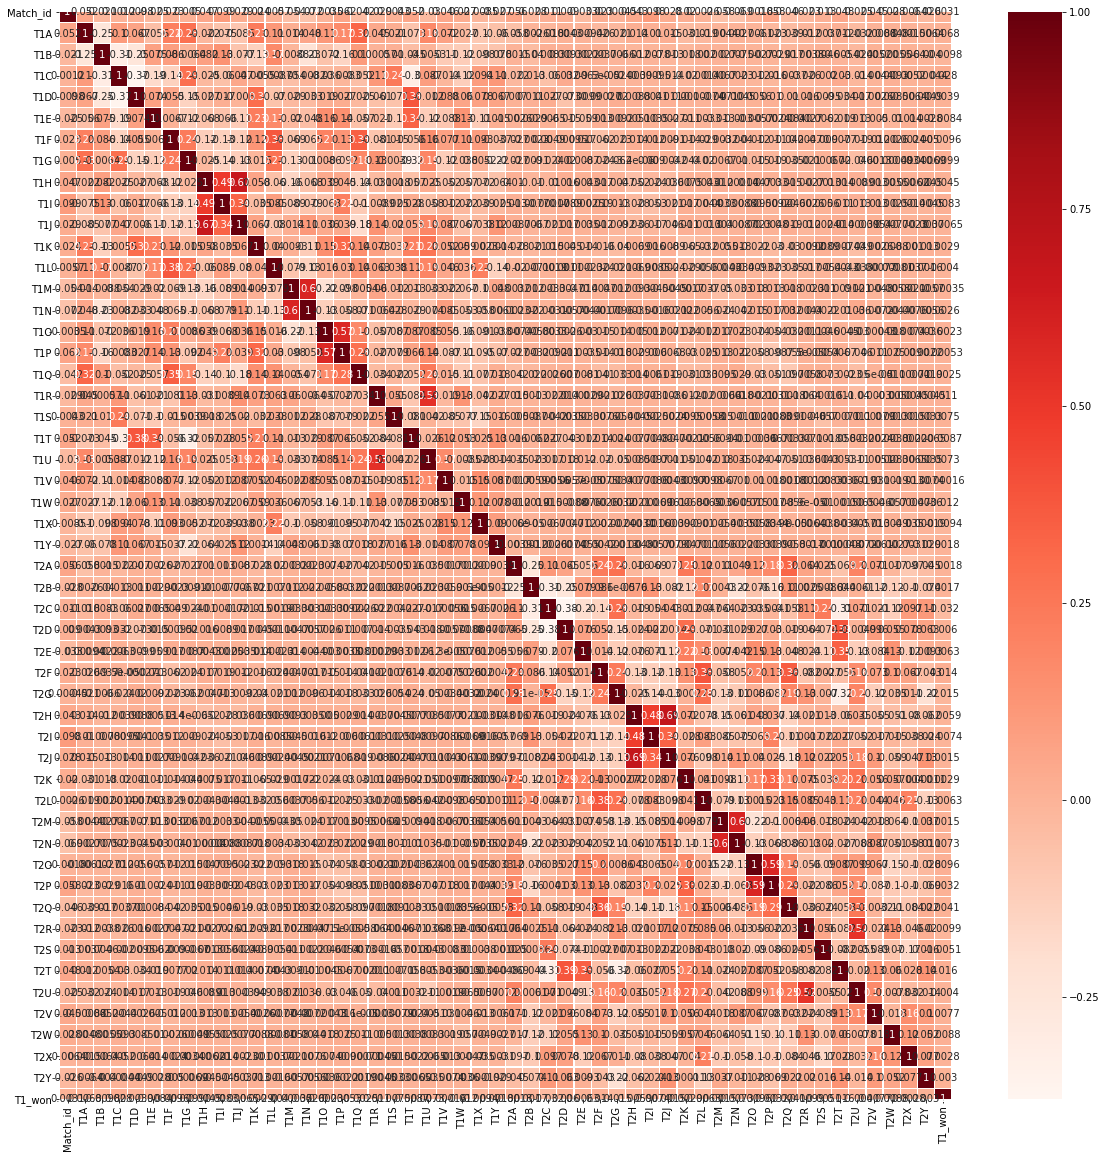

In [17]:
corr = df10.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds,linewidths=.2, ax=ax)
plt.show()

In [18]:
cor_target = abs(corr["T1_won"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01].sort_values(ascending=False)
relevant_features

T1_won    1.000000
T2C       0.031599
T1C       0.027832
T2T       0.015615
T2G       0.014952
T2F       0.013646
T1W       0.012184
T1R       0.011276
Name: T1_won, dtype: float64

In [20]:
cor_target.sort_values(ascending=False)

T1_won      1.000000
T2C         0.031599
T1C         0.027832
T2T         0.015615
T2G         0.014952
T2F         0.013646
T1W         0.012184
T1R         0.011276
T2R         0.009928
T1G         0.009856
T1B         0.009762
T1F         0.009603
T2O         0.009591
T1X         0.009446
T2W         0.008841
T1T         0.008727
T1E         0.008362
T1I         0.008254
T2V         0.007689
T1S         0.007515
T2I         0.007408
T2N         0.007338
T1U         0.007295
T1A         0.006832
T2E         0.006305
T2L         0.006271
T2D         0.005973
T2H         0.005937
T2S         0.005122
T1H         0.004467
T2Q         0.004123
T1L         0.003998
T2U         0.003992
T1D         0.003905
T2P         0.003249
Match_id    0.003080
T2Y         0.002998
T2K         0.002861
T1K         0.002859
T2X         0.002758
T1N         0.002615
T1Q         0.002484
T1O         0.002348
T2A         0.001772
T1Y         0.001766
T2B         0.001703
T2M         0.001530
T2J         0

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(df10.drop(columns=['T1_won']),df10['T1_won'])
print(model.feature_importances_) 

/Users/ricardorodriguez/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.02973171 0.0249751  0.02221187 0.02031972 0.02212376 0.0207041
 0.02493737 0.02435352 0.01521396 0.00646726 0.0203155  0.02353377
 0.02515194 0.02098806 0.01347238 0.02405961 0.02083143 0.02307927
 0.01246544 0.02137432 0.02155556 0.02057491 0.0132499  0.01135955
 0.02161623 0.01391165 0.02526202 0.02334235 0.01854572 0.02323145
 0.02128461 0.02281333 0.02330254 0.01516427 0.00601407 0.0186787
 0.02402174 0.02453182 0.02125541 0.01165261 0.02207457 0.02001666
 0.0223853  0.01269958 0.02286964 0.02283496 0.02057408 0.01297376
 0.010644   0.02229133 0.01295759]


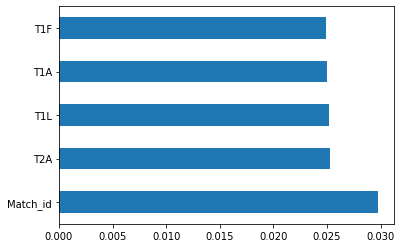

In [80]:
feat_importances = pd.Series(model.feature_importances_, index=df10.drop(columns=['T1_won']).columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

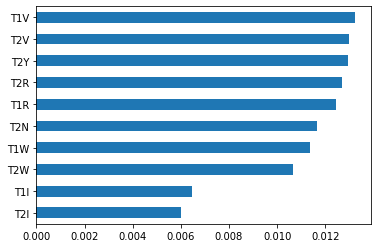

In [81]:
feat_importances.nsmallest(10).plot(kind='barh')
plt.show()

## 1. Match Evaluation : Difference

In [4]:
df1=df10[['T1A','T1B','T1C','T1D','T1E','T1F','T1G','T1H','T1I','T1J','T1K','T1L',
              'T1M','T1N','T1O','T1P','T1Q','T1R','T1S','T1T','T1U','T1V','T1W','T1X','T1Y']]
df2=df10[['T2A','T2B','T2C','T2D','T2E','T2F','T2G','T2H','T2I','T2J','T2K','T2L',
              'T2M','T2N','T2O','T2P','T2Q','T2R','T2S','T2T','T2U','T2V','T2W','T2X','T2Y']]
df2.columns = df1.columns
df1=df1.subtract(df2)

In [28]:
df1['T1_won']=df10['T1_won']
df1

,T1A,T1B,T1C,T1D,T1E,T1F,T1G,T1H,T1I,T1J,...,T1Q,T1R,T1S,T1T,T1U,T1V,T1W,T1X,T1Y,T1_won
0,0,-2,-1,2,1,-1,-1,0,0,0,...,-1,-2,0,-1,-2,1,1,-1,-1,0
1,-1,-1,2,-2,0,-2,-3,1,0,2,...,-2,1,2,-1,0,0,0,-1,0,0
2,0,1,0,0,0,-1,-1,0,0,0,...,1,0,1,1,2,1,-2,0,0,0
3,-2,1,-1,-1,2,0,0,-1,0,0,...,-1,1,0,2,0,0,0,-1,0,1
4,3,1,1,-1,0,2,2,1,0,-2,...,2,0,0,-1,0,0,0,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130983,0,-3,1,1,1,-1,2,1,0,2,...,-1,1,1,-1,0,0,0,-1,-1,1
130984,1,-1,0,1,1,0,0,-2,0,-3,...,1,0,0,2,0,0,0,0,0,0
130985,-3,1,1,1,-2,0,1,1,0,1,...,-1,0,1,0,-1,0,0,-1,0,0
130986,-1,2,1,-1,1,0,1,0,0,0,...,0,0,1,-1,1,1,0,1,0,0


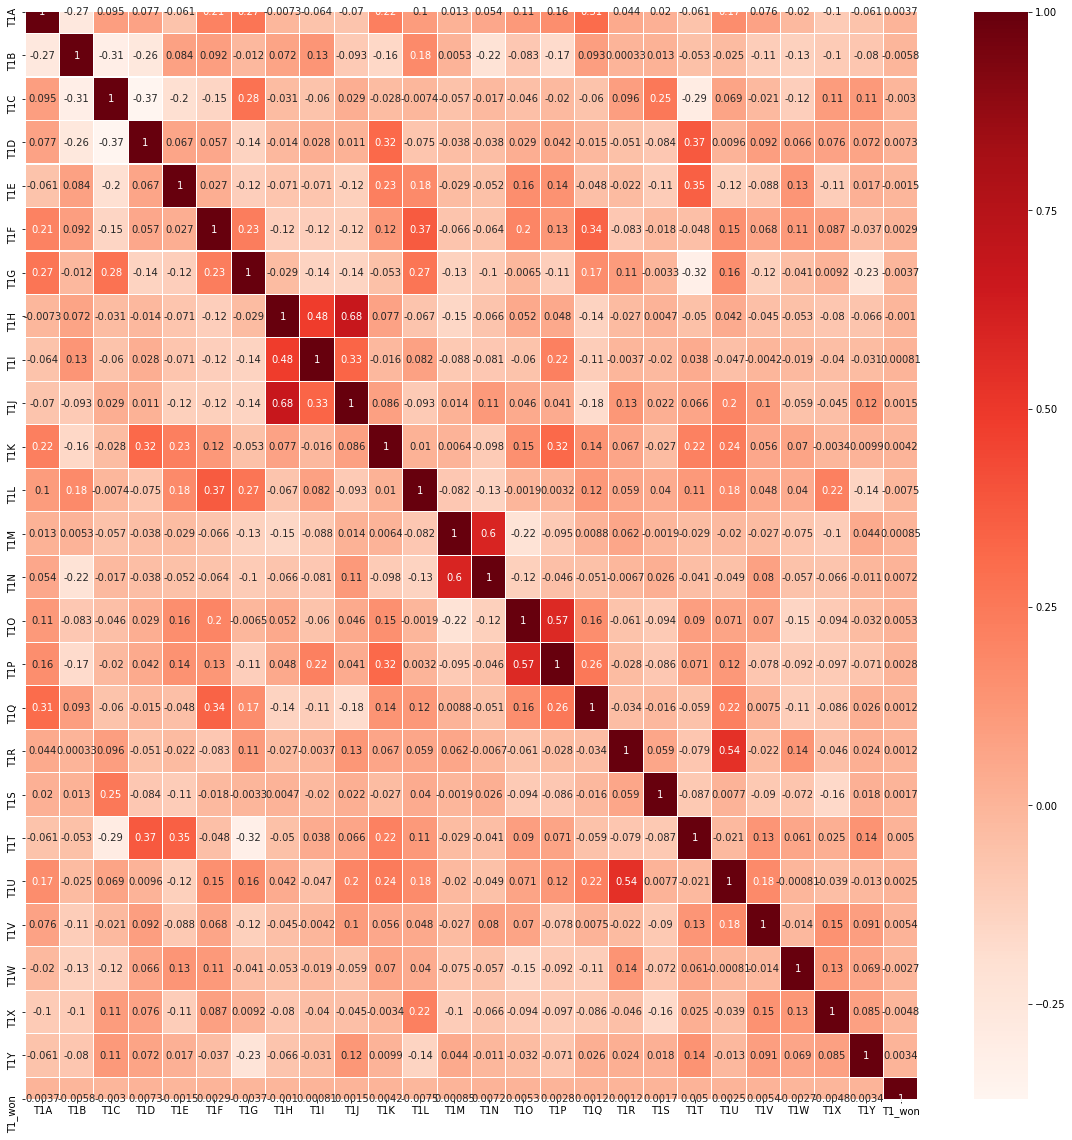

In [56]:
corr_0 = df1.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_0, annot=True, cmap=plt.cm.Reds,linewidths=.2, ax=ax)
plt.show()

In [60]:
cor_target_0 = abs(corr_0["T1_won"])
relevant_features = cor_target_0[cor_target_0>0.001].sort_values(ascending=False)
relevant_features

T1_won    1.000000
T1L       0.007466
T1D       0.007253
T1N       0.007178
T1B       0.005847
T1V       0.005379
T1O       0.005316
T1T       0.004971
T1X       0.004802
T1K       0.004183
T1A       0.003713
T1G       0.003676
T1Y       0.003406
T1C       0.002958
T1F       0.002930
T1P       0.002816
T1W       0.002707
T1U       0.002488
T1S       0.001674
T1J       0.001542
T1E       0.001525
T1Q       0.001240
T1R       0.001177
T1H       0.001037
Name: T1_won, dtype: float64

Implementing a Decision Tree test

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(df1.drop(columns=['T1_won']),df1['T1_won'])
print(model.feature_importances_) 

/Users/ricardorodriguez/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.04933674 0.0457119  0.03325994 0.04576749 0.04509216 0.04514661
 0.04729489 0.03312704 0.01213633 0.04230512 0.04777854 0.04949128
 0.04394822 0.03236503 0.04498561 0.0437938  0.04435752 0.02765868
 0.04666803 0.04331991 0.04338831 0.02947917 0.02681487 0.04227018
 0.03450261]


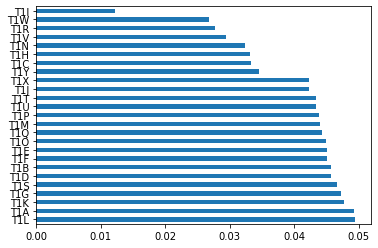

In [50]:
feat_importances = pd.Series(model.feature_importances_, index=df1.drop(columns=['T1_won']).columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.show()

## 2. Match Evaluation : Addition

In [68]:
df1=df10[['T1A','T1B','T1C','T1D','T1E','T1F','T1G','T1H','T1I','T1J','T1K','T1L',
              'T1M','T1N','T1O','T1P','T1Q','T1R','T1S','T1T','T1U','T1V','T1W','T1X','T1Y']]
df2=df10[['T2A','T2B','T2C','T2D','T2E','T2F','T2G','T2H','T2I','T2J','T2K','T2L',
              'T2M','T2N','T2O','T2P','T2Q','T2R','T2S','T2T','T2U','T2V','T2W','T2X','T2Y']]
df2.columns = df1.columns
df1=df1.add(df2)

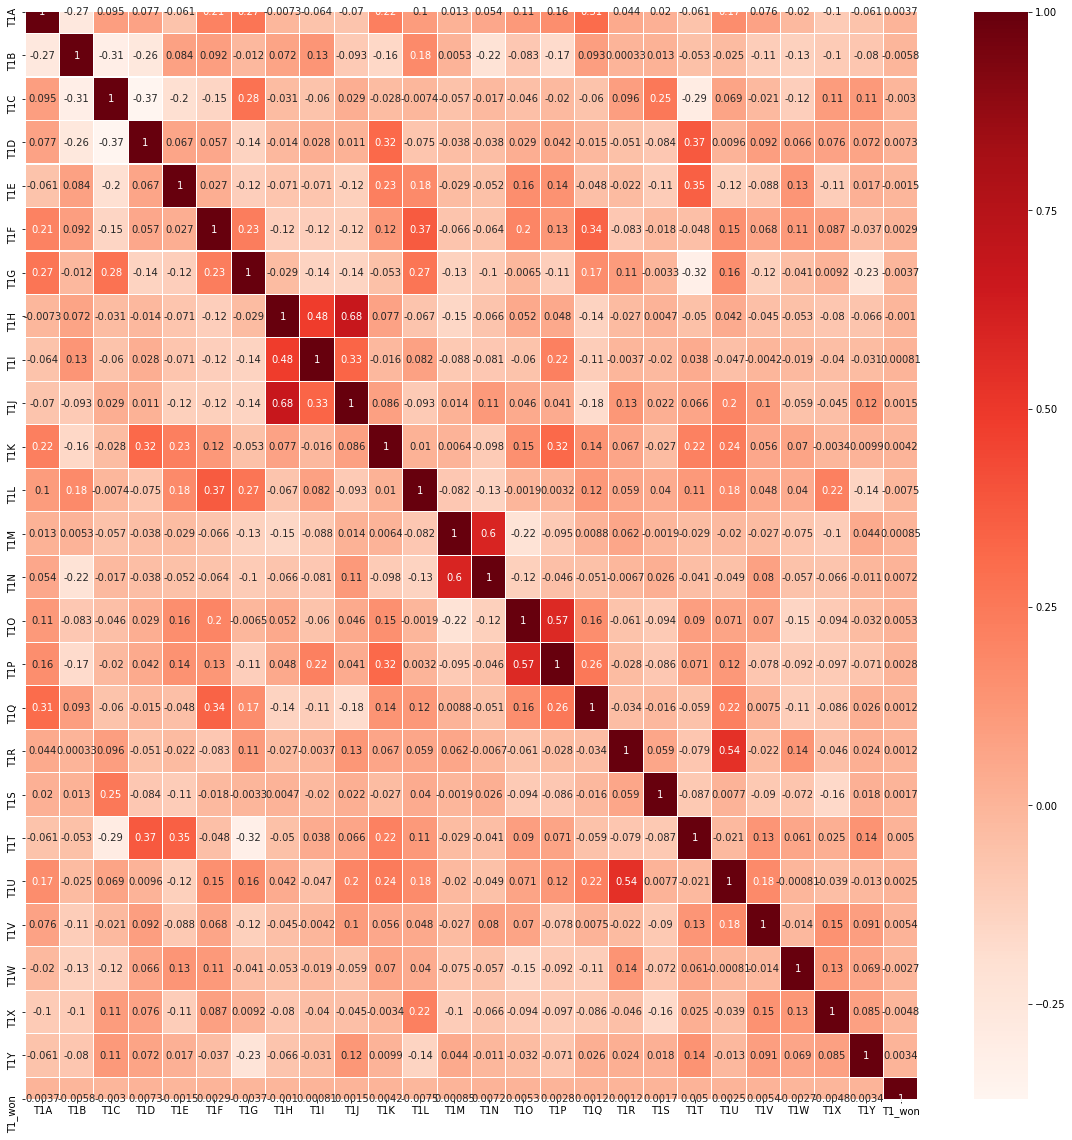

In [69]:
df1['T1_won']=df10['T1_won']
corr_1 = df1.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_1, annot=True, cmap=plt.cm.Reds,linewidths=.2, ax=ax)
plt.show() 

In [70]:
cor_target_1 = abs(corr_1["T1_won"])
relevant_features = cor_target_1[cor_target_1>0.001].sort_values(ascending=False)
relevant_features

T1_won    1.000000
T1L       0.007466
T1D       0.007253
T1N       0.007178
T1B       0.005847
T1V       0.005379
T1O       0.005316
T1T       0.004971
T1X       0.004802
T1K       0.004183
T1A       0.003713
T1G       0.003676
T1Y       0.003406
T1C       0.002958
T1F       0.002930
T1P       0.002816
T1W       0.002707
T1U       0.002488
T1S       0.001674
T1J       0.001542
T1E       0.001525
T1Q       0.001240
T1R       0.001177
T1H       0.001037
Name: T1_won, dtype: float64

In [71]:
model = ExtraTreesClassifier()
model.fit(df1.drop(columns=['T1_won']),df1['T1_won'])
print(model.feature_importances_) 

/Users/ricardorodriguez/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.05333905 0.04456625 0.05043737 0.04439555 0.04584023 0.04943933
 0.05286356 0.0299113  0.01097954 0.03970437 0.05120623 0.05126282
 0.04254284 0.02372257 0.04820997 0.0397344  0.04675472 0.02601051
 0.048352   0.04377112 0.03909001 0.02220735 0.02543817 0.04347997
 0.0267408 ]


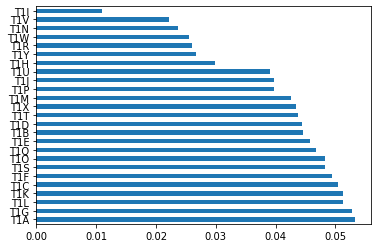

In [72]:
feat_importances = pd.Series(model.feature_importances_, index=df1.drop(columns=['T1_won']).columns)
feat_importances.nlargest(27).plot(kind='barh')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [5]:
#X_train, X_test, y_train, y_test = train_test_split(df10.drop(columns=['Match_id','T1_won','T1H','T2H','T1M','T2M',
#                                                                       'T1R','T2R','T1O','T2O','T1I','T2I',
#                                                                      ]),df10['T1_won'], test_size = 0.33, random_state = 42)

X_train=df10.drop(columns=['Match_id','T1_won','T1H','T2H','T1M','T2M',
                           'T1R','T2R','T1O','T2O','T1I','T2I',
                          ])
y_train=df10['T1_won']

In [7]:
# Deep network: tournament year could be added as a variable in the future
from keras.layers import Dense
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

Using TensorFlow backend.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 91691 samples, validate on 39297 samples
Epoch 1/30





91691/91691 [==============================] - 6s 68us/step - loss: 0.6909 - acc: 0.5357 - val_loss: 0.6908 - val_acc: 0.5327
Epoch 2/30
91691/91691 [==============================] - 4s 48us/step - loss: 0.6901 - acc: 0.5385 - val_loss: 0.6911 - val_acc: 0.5331
Epoch 3/30
91691/91691 [==============================] - 4s 49us/step - loss: 0.6897 - acc: 0.5391 - val_loss: 0.6907 - val_acc: 0.5343
Epoch 4/30
91691/91691 [==============================] - 5s 53us/step - loss: 0.6895 - acc: 0.5395 - val_loss: 0.6907 - val_acc: 0.5329
Epoch 5/30
91691/91691 [==============================] - 5s 56us/step - loss: 0.6892 - acc: 0.5391 - val_loss: 0.6904 - val_acc: 0.5329
Epoch 6/30
91691/91691 [==================

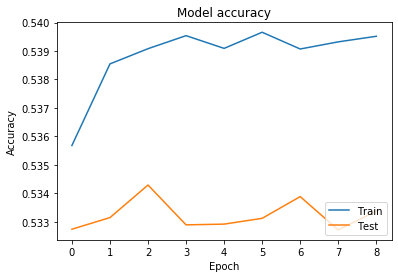

In [8]:
n_cols = X_train.shape[1]
model = Sequential()
model.add(Dropout(0.1, seed = 42, input_shape = (n_cols, )))
# model.add(Dense(51, activation = 'relu', input_shape = (n_cols, ), kernel_constraint = max_norm(2.)))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(70, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 4)
history = model.fit(X_train, y_train, epochs = 30, validation_split = 0.3, batch_size = 128, callbacks = [early_stopping])

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'lower right')
plt.show()

## Test new Model

In [53]:
#hein?? what is all this??
def getModel(arr):
    model=Sequential()
    for i in range(len(arr)):
        if i!=0 and i!=len(arr)-1:
            if i==1:
                model.add(Dense(arr[i],input_dim=arr[0],kernel_initializer='normal', activation='relu'))
            else:
                model.add(Dense(arr[i],activation='relu'))
    model.add(Dense(arr[-1],kernel_initializer='normal',activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['accuracy'])
    return model

In [ ]:
secondModel=getModel([30,100,1])

In [ ]:
secondModel.fit(np.array(X_train),np.array(y_train),epochs=40)

## Test2 using Difference

In [65]:
#X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns=['T1_won']),df1['T1_won'], test_size = 0.4, random_state = 42)
X_train=df1.drop(columns=['T1_won'])
y_train=df1['T1_won']



Train on 91691 samples, validate on 39297 samples
Epoch 1/20
91691/91691 [==============================] - 9s 99us/step - loss: 0.6903 - acc: 0.5367 - val_loss: 0.6909 - val_acc: 0.5330
Epoch 2/20
91691/91691 [==============================] - 5s 52us/step - loss: 0.6893 - acc: 0.5387 - val_loss: 0.6911 - val_acc: 0.5329
Epoch 3/20
91691/91691 [==============================] - 5s 55us/step - loss: 0.6888 - acc: 0.5390 - val_loss: 0.6910 - val_acc: 0.5312
Epoch 4/20
91691/91691 [==============================] - 5s 56us/step - loss: 0.6885 - acc: 0.5412 - val_loss: 0.6914 - val_acc: 0.5328


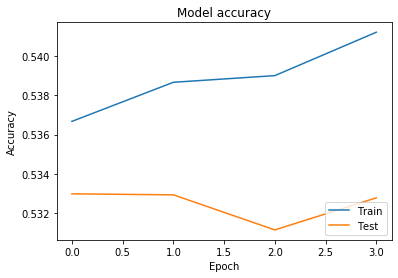

In [68]:
n_cols = X_train.shape[1]
model = Sequential()
model.add(Dropout(0.1, seed = 42, input_shape = (n_cols, )))
# model.add(Dense(51, activation = 'relu', input_shape = (n_cols, ), kernel_constraint = max_norm(2.)))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)
history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.3, batch_size = 128, callbacks = [early_stopping])

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'lower right')
plt.show()

## Test2 using Difference combining df1 and df10

In [39]:
teams_and_dif = pd.concat([df10.drop(columns=['T1_won']), df1], axis=1, sort=False)

In [40]:
teams_and_dif

,Match_id,T1A,T1B,T1C,T1D,T1E,T1F,T1G,T1H,T1I,...,T1Q,T1R,T1S,T1T,T1U,T1V,T1W,T1X,T1Y,T1_won
0,1857075079,2,1,1,3,2,1,1,0,0,...,-1,-2,0,-1,-2,1,1,-1,-1,0
1,1886474639,2,1,3,0,0,1,2,1,0,...,-2,1,2,-1,0,0,0,-1,0,0
2,1919021946,2,2,1,2,1,2,2,0,0,...,1,0,1,1,2,1,-2,0,0,0
3,1944067475,1,2,2,1,2,2,3,0,0,...,-1,1,0,2,0,0,0,-1,0,1
4,1950365896,4,2,2,1,0,3,4,1,0,...,2,0,0,-1,0,0,0,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130983,2380714613,3,0,3,2,1,2,4,1,0,...,-1,1,1,-1,0,0,0,-1,-1,1
130984,2380731464,2,1,0,2,1,2,2,0,0,...,1,0,0,2,0,0,0,0,0,0
130985,2380733765,0,3,2,1,0,1,4,1,0,...,-1,0,1,0,-1,0,0,-1,0,0
130986,2380735100,2,2,2,1,1,3,4,0,0,...,0,0,1,-1,1,1,0,1,0,0


In [61]:
#X_train, X_test, y_train, y_test = train_test_split(teams_and_dif.drop(columns=['Match_id','T1_won']),teams_and_dif['T1_won'], test_size = 0.4, random_state = 42)

X_train=teams_and_dif.drop(columns=['Match_id','T1_won'])
y_train=teams_and_dif['T1_won']


Train on 91691 samples, validate on 39297 samples
Epoch 1/20
91691/91691 [==============================] - 11s 116us/step - loss: 0.6897 - acc: 0.5382 - val_loss: 0.6905 - val_acc: 0.5332
Epoch 2/20
91691/91691 [==============================] - 6s 71us/step - loss: 0.6890 - acc: 0.5390 - val_loss: 0.6906 - val_acc: 0.5334
Epoch 3/20
91691/91691 [==============================] - 7s 75us/step - loss: 0.6886 - acc: 0.5394 - val_loss: 0.6906 - val_acc: 0.5335
Epoch 4/20
91691/91691 [==============================] - 7s 76us/step - loss: 0.6884 - acc: 0.5409 - val_loss: 0.6912 - val_acc: 0.5346


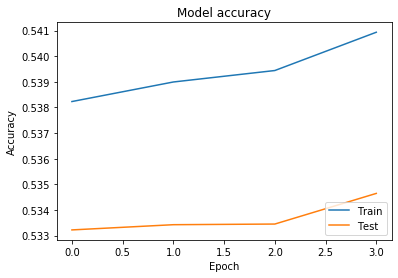

In [64]:
n_cols = X_train.shape[1]
model = Sequential()
model.add(Dropout(0.1, seed = 42, input_shape = (n_cols, )))
# model.add(Dense(51, activation = 'relu', input_shape = (n_cols, ), kernel_constraint = max_norm(2.)))
model.add(Dense(60, activation = 'relu'))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)
history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.3, batch_size = 128, callbacks = [early_stopping])

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'lower right')
plt.show()